# <center>Alzheimer's Disease Biomarker Analysis</center>

### <center>Ryan Cummings, Justin Kang, Gregory Thein</center>
### <center>DSC 180B - Genetics (B04) WI21</center>


## Abstract

WIP

## Introduction

### Background

For this project, our group intends to further contribute to the current research being conducted about Alzheimer’s disease, its pathology and effect it has on those that are currently diagnosed with the disease. Alzheimer’s is an age-related neurodegenerative disease that currently affects more than 5.5 million Americans and is considered the 6th leading cause of death in the United States[1]. It is an irreversible disease that causes those diagnosed to experience declines in both their mental and physical abilities as a result of abnormally rapidly declining brain function. The features of Alzheimer’s associated with the loss in proper brain function include amyloid plaques, neurofibrillary tangles, chronic inflammation, vascular contributions and the loss of neural connections and cell death[1]. As a result, Alzheimer’s patients undergo symptoms that generally include confusion, difficulty speaking and severe memory loss. The disease itself can be diagnosed at all age levels, however is generally more common with individuals 65 years of age or older. At this time, current treatments can help manage symptoms, but a cure nor a cause for the disease has yet to be identified, despite the ongoing research. What is clear, however, is that genetics, the environment, an individuals lifestyle, and age, are factors for an Alzheimer’s diagnosis. 

Drawing inspiration from similar projects[7], we set out to elucidate biomarkers that exist for Alzheimer's Disease (AD) by observing blood miRNA sample data from 44 patients diagnosed with Alzheimer's and a separate control group consisting of 22 patients. There are currently several biomarkers for AD that have been identified to help diagnose the diease[7]. With this project we make the attempt isolate those same biomarkers, such as miRNA, and describe in detail their impact in the biological processes that of AD, within the constraints of the data available for this project. In the end, we believe new information about the disease could be discovered to aid in the development of new possible treatments and maybe even contribute in identifying the exact causes of the disease. The intentions of the project are to supplement the world's current understanding of the disease in order to help the millions that are currently affected. 

### Biomarkers

Since 2015, there are currently several different types of biomarkers that have been defined for different context uses after a need for establishing a clear and unambigous translation for biomarkers within the medical and scientific community was required[8]. According to the National Institutes of Health Biomarkers Definitions Working Group, a biomarker is defined as a characteristic that is objectively measured and evaluated as an indicator of normal biological processes, pathogenic processes, or pharmacologic responses to a therapeautic intervention[6]. Observing such biomarkers assist in understanding what is going on inside a living body and can help doctors and researchers in diagnosing diseases as well as monitor how a persons conditions change over time. Examples of these biomarkers include Pharmacodynamic or Response Biomarkers, which is a biomarker that shows whether or not an individual has a biological response after exposure to medical or environmental agents, and Prognastic Biomarkers, which are biomarkers that indicate the progression or recurrence of a particular disease or condition[8]. For the purposes of this project, Diagnostic Biomarkers, which are used to detect the presence of a particular disease or condition, would be what we are most interested in, however, we would not limit ourselves to just observing one particular biomarker. 

When it comes to Alzheimer's specific biomarkers, the most common biomakers derive from taking measurements of the brain, from its function to its size. These measurements can be taken from brain imaging technology such as Computerized Topography (CT) scans and from Magnetic Resonance Imaging (MRI) scans[5]. Cerebrospinal Fluid and blood are additional biomarkers associated with AD and other similar dementias as well. Both are involved with identifying the proteins that are produced that revolve around the brain and its functions such as beta-amyloid 42 and tau[5]. Due the serious implications AD has to the brain and overall brain function, being able to identify symptoms or signs of the disease early on in the diagnostic process is crucial[5]. This is in large part on why biomarkers are a useful tool in the fight against the disease as it allows medical professionals to monitor brain changes of a patient that they themselves may not realize. 

### miRNA in Relation to Alzheimer's Disease

MicroRNAs (miRNAs) are non-coding RNA molecules that are involved in the regulation of gene expression[9]. How miRNA regulates gene expression is by binding to Messenger RNA (mRNA) and preventing mRNA from producing protiens. It is believed that over 30 percent of protein coding genes are regulated by miRNAs and that it counts for roughly 5 percent of the entire human genome[9]. miRNA themselves are 19-20 nucleotides in length and have a 3"-hydroxyl and 5"-phosphate end and although the complete understanding of miRNA is still to be discovered, it is believed they play a crucial role in being able to control metablloic and cellular pathways[9]. 

The role of miRNA is important in the project, not only because our data is comprised of blood samples that contain miRNA information, but the ability of miRNA to be considered its own biomarker as well. Specifically, circulating miRNAs are believed to be an additional measurement aside from protein levels, that could lead to increased effectiveness in diagnosing AD in patients[10]. Looking at miRNA as biomarkers would allow researchers to not only take note of physical observations provided by brain images, but observations on a gene expression level more so than just the proteins involved with AD, but the biological processes that lead the creation of such proteins in the first place. Within the context of the project, being able to analyze the road map that leads to AD specific pathology is a goal for the team.  




## Methods



### Pipeline

The data utilized for this project is from SRA study SRP022043. This dataset included 44 blood samples from Alzheimer’s Disease and 22 blood samples from control patients. We utilized the wget function to obtain the data and store it in our database. Afterwards, we ran fastqc to all of the files to ensure the quality of each file. We then ran cutadapt to remove the adapter sequences for the files, and then ran fastqc again to check the quality of each read sequence again. If the reads did not pass, we decided to remove them before running kallisto. Kallisto allowed us to generate the quantification of non-coding RNA of each sample. We then ran a python script to combine all of the individual tsv’s into a counts matrix that will be used for DESeq2. After running DESeq2, we plan to then generate graphs and figures while also trying to identify various biomarkers that may be significant between Alzheimer’s patients and control patients (markers that have a difference in quantification between the two groups). We hope to then research more regarding the functions of those biomarkers and how it relates to Alzheimer’s.

### Cutadpt

Similar to the project implementation from last quarter, we used cutadapt as part of our project pipeline. During sequencing procedures, cutadapt allows one to remove adapter sequences found in RNA and DNA molecules[11]. This is an important tool within the pipeline as it allowed us to negate any unnecessary information from our data prior to additional analysis being performed on the data. How it does this is by removing adapter sequences attached to molecules as a result of the molecules length during sequencing processes[11]. Additional changes were made prior to our implementation of it as our data did not involve gene expression data. For the adapter sequence, we used the standard Illumina Sequence of "AGATCGGAAGAGC". 

### Kallisto

We utilized kallisto to generate our quantifications due to its speed with reliable accuracy. Kallisto utilizes a pseudo alignment system that is effective at getting accurate counts quickly. We obtained a reference file from the Ensembl reference transcriptomes. We used a homo sapiens non coding RNA file as the reference as miRNA is considered a ncRNA. For the kallisto settings, because our reads were single ended reads, we had to supply the length (in this case, 50 base pairs), and standard deviation (we used 10). We also decided to make the bootstrap length 8 and number of threads 8 (so that it runs faster). Kallisto generates a runinfo.json, abundance.tsv, and abundance.h5 file report. 

### FastQC

Once we have access to the fastq.qz files, we were then able to run FastQC on our files to ensure that the quality of the data was in a matter that allowed us to analyze our date without the fear of the data's quality affecting the outcomes. Several analyses are performed during a FastQC implementation and we were able to determine the quality of each file by looking at the provided analysis such as sequence length distribution, which measures sequence fragment sizes, duplicate sequences, which counts for each sequence their degree of duplication, and contents found in adapters[12]. Similar to our replication project, we ran FastQC twice: once prior to cutadapt and again after cutadapt was performed on the data. The necessity to perform FastQC twice comes down to whether implementing cutadapt within our pipeline is necessary to ensure quality data. If its found that the quality of the data did not have any significant differences made after implmenting cutadapt, then it may not be necessary to include it as part of the final pipeline process.

- implementation differences from last quarter (specific)
- tables/figures?

### For the Future

In the next coming weeks, we will run DESeq2 on our quantification matrix and identify the biomarkers that are significant. We also will then publish our results onto a website that will discuss our findings. 


## Results

Currently, we have processed all of our data and generated a quantification matrix that has all of the counts of the samples of various non-coding RNA. However, we have not gotten to run DESeq2 to generate figures for our project yet. We hope to do that within the upcoming week. For our current results, we have just done some preliminary EDA on the information regarding our data. 

### Patients Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
patients = pd.read_csv("../references/SraRunTable.txt")

Text(0, 0.5, '# of Patients')

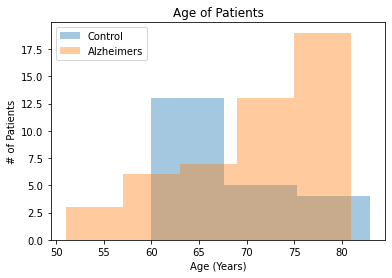

In [5]:
df = patients[patients['GROUP'] == 'control']
sns.distplot(df['Age'],  kde=False, label='Control')

df = patients[patients['GROUP'] == 'alzheimer patient']
sns.distplot(df['Age'],  kde=False, label='Alzheimers')

plt.legend(prop={'size': 10})
plt.title('Age of Patients')
plt.xlabel('Age (Years)')
plt.ylabel('# of Patients')

Above shows the age of patients within our data separated by Alzeheimer's and Control. Below shows the counts of gender vs. the group of patients. 

Text(0, 0.5, 'Count')

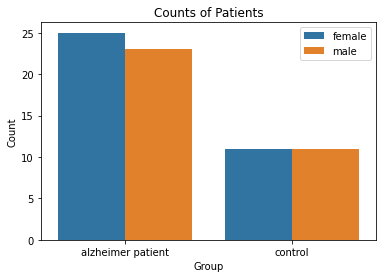

In [12]:
gender = patients.groupby(['gender', 'GROUP'])['GROUP'].agg(['count'])
gender = gender.reset_index()

ax = sns.barplot(x="GROUP", y="count", hue="gender", data=gender)
plt.legend(prop={'size': 10})
plt.title('Counts of Patients')
plt.xlabel('Group')
plt.ylabel('Count')

### EDA

WIP

### Analysis

WIP

## Discussion

WIP

## References

Main Article/Project Inspiration URL:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4053778/

miRNA in Alzheimer's URL:
https://pubmed.ncbi.nlm.nih.gov/23889814/

Alzheimer's Biomarkers URL:
https://pubmed.ncbi.nlm.nih.gov/30051512/



[1] NIH Alzheimer’s Facts URL: https://www.nia.nih.gov/health/alzheimers-disease-fact-sheet 

[2] NIH Alzheimer Brain Impact URL: https://www.nia.nih.gov/health/what-happens-brain-alzheimers-disease 

[3] NIAGADS Data (Main) URL: 
https://www.niagads.org/datasets/ng00038 

[4] ArrayExpress Data (Backup) URL:
https://www.ebi.ac.uk/arrayexpress/experiments/E-GEOD-53697/?keywords=alzheimer%27s+&organism=Homo+sapiens&exptype%5B%5D=%22rna+assay%22&exptype%5B%5D=&array= 

[5] NIH Biomarkers Definition URL:
https://www.nia.nih.gov/health/biomarkers-dementia-detection-and-research#:~:text=The%20most%20widely%20used%20CSF,tau%20tangles%20in%20the%20brain)

[6] NCBI Biomarkers Definition URL:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3078627/

[7] NCBI Project Inspiration URL
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4053778/

[8] Biomarker Types URL:
https://www.ncbi.nlm.nih.gov/books/NBK326791/

[9] MicroRNA Definition:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3048316/

[10] miRNA and Alzheimer’s Disease:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4053843/

[11] Martin, Marcel Bioinformatics in Action (2011) URL:
http://journal.embnet.org/index.php/embnetjournal/article/view/200/479

[12] Andrews, S. Babraham Bioinformatics URL: 
https://www.bioinformatics.babraham.ac.uk/projects/fastqc/




## Appendix

### For Checkpoint - 2/7/2021

Up to this checkpoint, our group was working towards first acquiring the appropriate data and then preparing that data in order to complete our new objectives after having to change directions from our initial project proposal. The first two weeks of our project were spent working with the professor in gaining access to Alzheimer's Disease data from  the National Institute on Aging Genetics of Alzheimer's Disease database. Unfortunately, by the time Week 2 came around, it was unlikely that we would be granted access and therefore as a group made the decision to change our project which instead of revolving around gene expression data, focused on blood sample data. 

This decision hinged largely on the fact that this particular blood sample data was publicly available to us and therefore allowed us to quickly get started on data preprocessing. The remaining weeks were spent on preprocessing our data which we began first with the professor to ensure that our data was appropriate in terms of our new project objectives. Cutadapt, FastQC, and Kallisto were then constructed and we were able to successfuly run our data through these tools which now allows us to spend the remaining time on performing EDA and gathering detailed analyses of our project results. We may have lost some time in the beginning because of our decision to focus on data other than gene expression data, however, we are confident that the work we have completed thus far will allow us complete the project in a timely manner.

### Project Decision

- Our project focus shifted from looking at gene expression data for Alzheimer's Disease patients, to observing blood sample data of patients diagnosed with Alzheimer's Disease and a control group. This was done in large part because of the lack of access to the databases we initially wanted to retrieve data from
- After spending time searching for a viable replacement dataset on Recount2, we set on data from SRA Study SRP022043 and downloaded the data onto DSMLP from the SRA Run Selector Tool 
- We initially implemented the dockerfile for this project based on the dockerfile used in last quarters replication and had hoped to implement TrimGalore as a new tool into our pipeline. Incompatibility issues, however, led us to drop TrimGalore as tool and stick with running Cutadapt and FastQC separately.

### Project Targets

WIP

- target descriptions

### Project Proposal (revised since initial submission):

For this project, our group intends to further contribute to the current research being conducted about Alzheimer’s disease, its pathology and effect it has on those that are currently diagnosed with the disease. Alzheimer’s is an age-related neurodegenerative disease that currently affects more than 5.5 million Americans and is considered the 6th leading cause of death in the United States[1]. It is an irreversible disease that causes those diagnosed to experience declines in both their mental and physical abilities as a result of abnormally rapidly declining brain function. The features of Alzheimer’s associated with the loss in proper brain function include amyloid plaques, neurofibrillary tangles, chronic inflammation, vascular contributions and the loss of neural connections and cell death[1]. As a result, Alzheimer’s patients undergo symptoms that generally include confusion, difficulty speaking and severe memory loss. The disease itself can be diagnosed at all age levels, however is generally more common with individuals 65 years of age or older. At this time, current treatments can help manage symptoms, but a cure nor a cause for the disease has yet to be identified, despite the ongoing research. What is clear, however, is that genetics, the environment, an individuals lifestyle, and age, are factors for an Alzheimer’s diagnosis. 

Rather than observing gene expression data similar to our replication project from the previous quarter, this project focused on biomarkers commonly associated with Alzheimer's Disease and other related diseases. According to the National Institutes of Health Biomarkers Definitions Working Group, a biomarker is defined as a characteristic that is objectively measured and evaluated as an indicator of normal biological processes, pathogenic processes, or pharmacologic responses to a therapeutic intervention[6]. Observing such biomarkers assist in understanding what is going on inside a living body and can help doctors and researchers in diagnosing diseases as well as monitor how a persons conditions change over time. 

We set out to elucidate the biomarkers that exist for Alzheimer's Disease, by observing blood miRNA samples from a patient diagnosed with Alzheimer's and a separate control group. By doing so, we believe new information about the disease could be discovered to aid in the development of new possible treatments and maybe even contribute in identifying the exact causes of the disease. The intentions of the project are to supplement the world's current understanding of the disease in order to help the millions that are currently affected. 

Similar approaches will be used in this project as seen and conducted from our previous replication project from the previous quarter. Tools such as FastQC will play an important role in ensuring that the data being used to conduct this research is at a standard that allows unbiased analysis to be performed. This is similar to how we used it to ensure quality patient samples of those with a disorder (Major Depressive Disorder, Schizophrenia, and Bipolar Disorder) and the control group from the replication paper. DESeq2 will be a primary tool in being able to conduct differential analysis between what would be our control group and samples with patients diagnosed with Alzheimer’s. We are able to use much of the same project pipelines we have already created for this new project, with room for modifications, if necessary. By having the pipeline already built, we are able to divert more time away from building the pipeline to other areas of the project such as testing additional test samples, interpreting our findings, and additional exploratory data analysis (EDA).

How this project differs from our replication project begins with the focus of this new project being on one disease rather than three. Focusing on one disease eliminates some of the complexities involved in having to maintain three separate disorders within the project pipeline steps. Where our samples come from will be specified once a final dataset has been decided and it will be mentioned in our eventual report for the project.

Project Output
At the conclusion of this project, we will output our results in a report styled similarly to our replication project. The report will include our findings such as biomarkers associated with Alzheimer's Disease that have already been discovered and potentially new information regarding those biomarkers. 


### Project Report Table of Contents (Subject to Change)

Abstract

Introduction:
- Background
- Biomarker definition
- miRNA definition

Methodology:
- Pipeline description
- Cutadapt definition
- Kallisto
- FastQC definition

Results:
- EDA
- Analysis

Discussion

References

Appendix